In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Plot styles
plt.style.use('fivethirtyeight')

%matplotlib inline

np.random.seed(15)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)

population_ages = np.concatenate((population_ages1, population_ages2))


In [2]:
popages=pd.DataFrame(population_ages)
popages

,0
0,60
1,40
2,49
3,49
4,44
...,...
249995,25
249996,29
249997,24
249998,28


(array([1.2884e+04, 7.3599e+04, 1.3532e+04, 1.0686e+04, 4.1189e+04,
        6.5358e+04, 2.8330e+04, 4.0270e+03, 3.7700e+02, 1.8000e+01]),
 array([18. , 24.6, 31.2, 37.8, 44.4, 51. , 57.6, 64.2, 70.8, 77.4, 84. ]),
 <BarContainer object of 10 artists>)

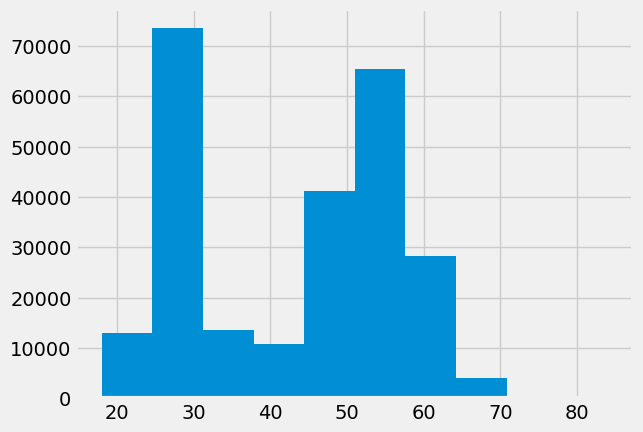

In [3]:
plt.hist(popages)

In [4]:
sample=popages.sample(n=500, random_state=5)
print(sample.mean())
print(sample.std())

0    41.832
dtype: float64
0    13.163218
dtype: float64


In [5]:
sample_chol_levels=[66.0, 36.0, 73.0, 48.0, 81.0, 69.0, 75.0, 81.0, 73.0,69.9, 101.0, 70.0]
chol_levels=np.array(sample_chol_levels)

chol_levels


array([ 66. ,  36. ,  73. ,  48. ,  81. ,  69. ,  75. ,  81. ,  73. ,
        69.9, 101. ,  70. ])

In [6]:
chol_levels_mean=np.mean(sample_chol_levels)
chol_levels_mean

np.float64(70.24166666666666)

In [7]:
chol_levels_std=np.std(sample_chol_levels, ddof=1)
chol_levels_std

np.float64(16.24334595699999)

In [8]:
#standard error
chol_levels_se=chol_levels_std/(np.sqrt(len(sample_chol_levels)))
chol_levels_se

np.float64(4.689050080407082)

In [9]:
#confidence interval
ct=stats.t.interval(confidence=0.95, df=len(sample_chol_levels)-1,loc=chol_levels_mean, scale=chol_levels_se)
ct

(np.float64(59.92113702480491), np.float64(80.5621963085284))

In [10]:
#weight of people. 10 values between 55 and 75
sample_weights=[56.2, 61.0, 55.0, 81.0, 73.0, 69.0, 66.0, 72.5 ,60.0]
weights=np.array(sample_weights)
weights

array([56.2, 61. , 55. , 81. , 73. , 69. , 66. , 72.5, 60. ])

In [11]:
#sample mean
sample_weights_mean=np.mean(sample_weights)
sample_weights_mean

np.float64(65.96666666666667)

In [12]:
weights.mean()

np.float64(65.96666666666667)

In [13]:
#standard deviation
sample_weights_std=np.std(sample_weights, ddof=1)
sample_weights_std


np.float64(8.683893136145791)

In [14]:
#standard error
sample_weights_se=sample_weights_std/(np.sqrt(len(sample_weights)))
sample_weights_se

np.float64(2.89463104538193)

In [15]:
#confidence interval
confidenceweight=stats.t.interval(confidence=0.95, df=len(sample_weights)-1, loc=sample_weights_mean, scale=sample_weights_se)
confidenceweight

(np.float64(59.29163550612558), np.float64(72.64169782720776))

In [16]:
df=pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [18]:
sample_df=df.sample(n=100 ,random_state=34)
sample_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
131,1023,0,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C
181,1073,0,1,"Compton, Mr. Alexander Taylor Jr",male,37.0,1,1,PC 17756,83.1583,E52,C
306,1198,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S
380,1272,0,3,"O'Connor, Mr. Patrick",male,NaN,0,0,366713,7.7500,NaN,Q
263,1155,1,3,"Klasen, Miss. Gertrud Emilia",female,1.0,1,1,350405,12.1833,NaN,S


In [19]:
sample_df['Age']=sample_df['Age'].fillna(sample_df['Age'].median())
sample_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass                                      Name  \
131         1023         0       1                 Gracie, Col. Archibald IV   
181         1073         0       1          Compton, Mr. Alexander Taylor Jr   
306         1198         0       1      Allison, Mr. Hudson Joshua Creighton   
380         1272         0       3                     O'Connor, Mr. Patrick   
263         1155         1       3              Klasen, Miss. Gertrud Emilia   
..           ...       ...     ...                                       ...   
26           918         1       1              Ostby, Miss. Helene Ragnhild   
210         1102         0       3               Andersen, Mr. Albert Karvin   
251         1143         0       3  Abrahamsson, Mr. Abraham August Johannes   
32           924         1       3  Dean, Mrs. Bertram (Eva Georgetta Light)   
142         1034         0       1                Ryerson, Mr. Arthur Larned   

       

In [20]:
age=sample_df['Age']

In [21]:
#population mean
mu=df['Age'].mean()
mu

np.float64(30.272590361445783)

In [22]:
xbar=age.mean()
xbar

np.float64(30.6992)

In [23]:
sd=np.std(age,ddof=1)
sd

np.float64(13.329074447093527)

In [24]:
se=sd/(np.sqrt(len(age)))
se

np.float64(1.3329074447093527)

In [25]:
age_confidence_interval=stats.t.interval(confidence=0.95, df=len(age)-1,loc=xbar, scale=se)
age_confidence_interval

(np.float64(28.054422453415583), np.float64(33.34397754658442))

In [26]:
pip install xlrd >=2.0.1

Note: you may need to restart the kernel to use updated packages.


In [28]:
##The question is similar to this but now we have to find those likely to survive by age, sex in addition to what we already did in class/ assignment (by pclass) then combination-wise eg by pclass and sex (gender) etc: #loading the ds
#first install pandas before running (can create a new venv)
import pandas as pd
data = pd.read_csv (r"tested.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [29]:
# count of people who survived in each passenger class
#we aggregate the Survived column.
grouped = data.groupby("Pclass")["Survived"].sum() #returns the count where the value is 1 or true
print("Total number of survivors by class:")
print(grouped)

Total number of survivors by class:
Pclass
1    50
2    30
3    72
Name: Survived, dtype: int64


In [30]:
grouped = data.groupby("Pclass")["Survived"].agg("count") #counts the number of columns ie returns all passengers in that class
print("Total number of passengers that boarded by class:")
print(grouped)

Total number of passengers that boarded by class:
Pclass
1    107
2     93
3    218
Name: Survived, dtype: int64


In [31]:
grouped = data.groupby("Pclass")["Survived"].agg("mean") 

In [32]:
#Calculates the mean (average) survival value for each passenger class.
#abit different from conventional mean eg if we have 100 passengers and 60 survivors, the mean would be 0.6 etc.
print("Survival rate by class:")
print(grouped)

Survival rate by class:
Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64
